In [8]:
!pip install openpyxl

In [10]:
!pip install scikit-learn

First 5 rows of the dataset:


,Date,Region,Category,Product,Sales,Discount,Profit
0,6/16/2016,West,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,0.00,6.8714
1,10/18/2015,South,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,0.45,-383.0310
2,10/18/2015,South,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,0.20,2.5164
3,6/14/2014,West,Furniture,Eldon Expressions Wood and Plastic Desk Access...,48.8600,0.00,14.1694
4,6/14/2014,West,Office Supplies,Newell 322,7.2800,0.00,1.9656



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6096 entries, 0 to 6095
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      6096 non-null   object 
 1   Region    6096 non-null   object 
 2   Category  6096 non-null   object 
 3   Product   6096 non-null   object 
 4   Sales     6096 non-null   float64
 5   Discount  6096 non-null   float64
 6   Profit    6096 non-null   float64
dtypes: float64(3), object(4)
memory usage: 333.5+ KB

Statistical Summary:


,Sales,Discount,Profit
count,6096.000000,6096.000000,6096.000000
mean,232.644305,0.156936,28.712018
std,654.223134,0.208448,230.232418
min,0.444000,0.000000,-3701.892800
25%,16.877250,0.000000,1.681850
50%,51.898500,0.200000,8.469600
75%,211.279000,0.200000,28.598400
max,22638.480000,0.800000,6719.980800


Number of duplicate rows: 1
Missing values before cleaning:
Date        0
Region      0
Category    0
Product     0
Sales       0
Discount    0
Profit      0
dtype: int64
Missing values after cleaning:
Date        0
Region      0
Category    0
Product     0
Sales       0
Discount    0
Profit      0
dtype: int64


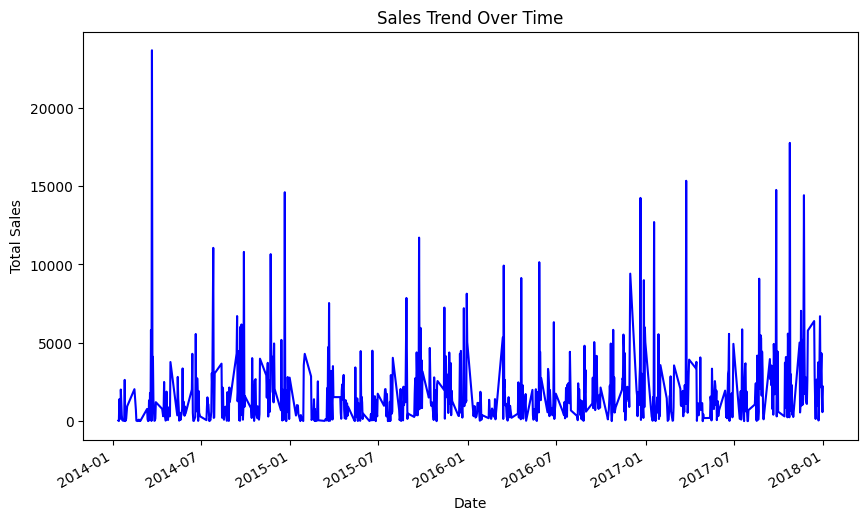

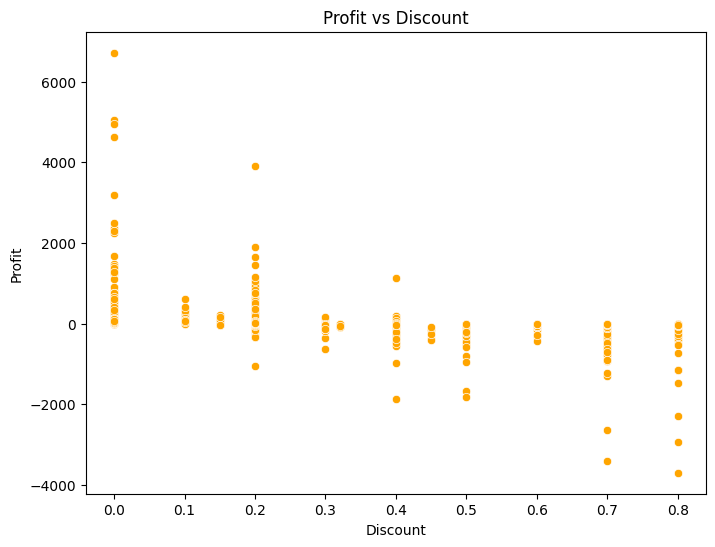

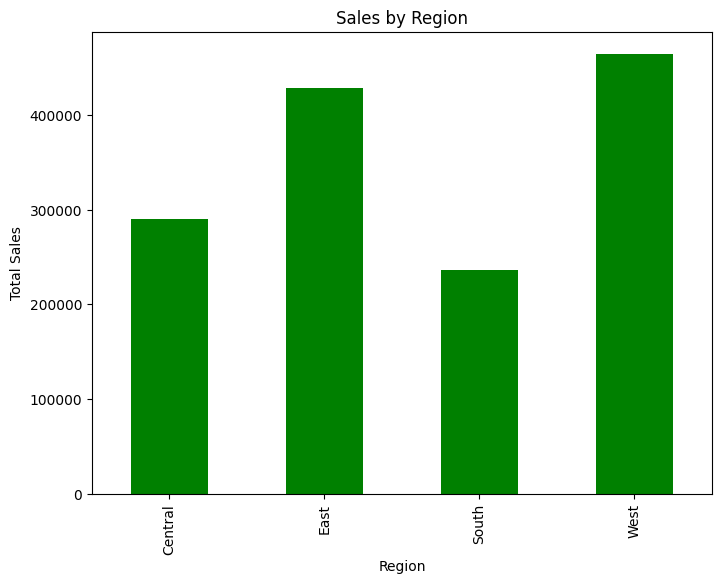

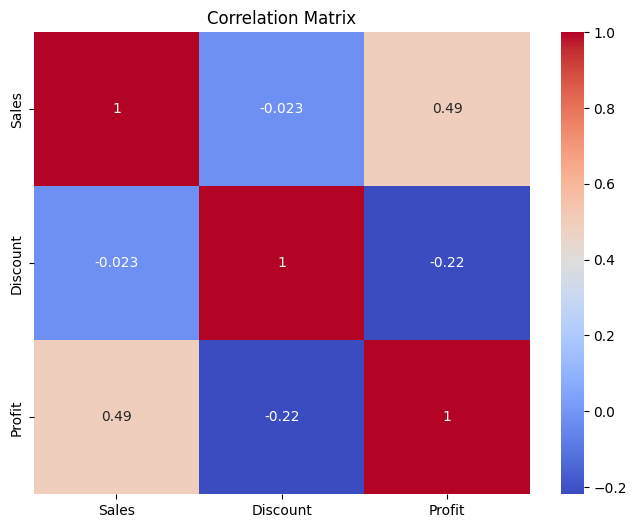

Mean Squared Error: 252065.89
R-squared Score: -0.11


In [11]:

!pip install openpyxl


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_excel(r"C:\Users\Unnati\OneDrive\Desktop\sales_data.xlsx")


print("First 5 rows of the dataset:")
display(df.head())


print("\nDataset Information:")
df.info()


print("\nStatistical Summary:")
display(df.describe())


duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
df = df.drop_duplicates()


print(f"Missing values before cleaning:\n{df.isnull().sum()}")
df.fillna(df.mean(numeric_only=True), inplace=True)
print(f"Missing values after cleaning:\n{df.isnull().sum()}")


try:
    df['Date'] = pd.to_datetime(df['Date'])
except Exception as e:
    print(f"Date conversion failed: {e}")


plt.figure(figsize=(10,6))
df.groupby('Date')['Sales'].sum().plot(kind='line', color='blue')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


plt.figure(figsize=(8,6))
sns.scatterplot(x='Discount', y='Profit', data=df, color='orange')
plt.title('Profit vs Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()


plt.figure(figsize=(8,6))
region_sales = df.groupby('Region')['Sales'].sum()
region_sales.plot(kind='bar', color='green')
plt.title('Sales by Region')
plt.ylabel('Total Sales')
plt.show()


plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Profit', 'Discount']]
y = df[['Sales']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared Score: {r2_score(y_test, y_pred):.2f}")
